### General Notes


### Data Loading

**Why the CarDD dataset?**
- Tracks tons of valuable properties about cars/car damages...
    - Damage types: dent, scratch, crack, glass shatter, tire
    flat, and lamp broken.
    - Data volume: it contains 4,000 car damage images with
    over 9,000 labeled instances which is the largest public
    dataset of its kind to our best knowledge.
    - High-resolution: the image quality in CarDD is far
    greater than that of existing datasets. The average resolution of CarDD is 684,231 pixels (13.6 times higher)
    compared to 50,334 pixels of the GitHub dataset [14].
    - Multiple tasks: our dataset comprises four tasks: classification, object detection, instance segmentation, and
    salient object detection (SOD).
    - Fine-grained: different from general-purpose object detection and segmentation tasks, the difference between
    car damage types like dent and scratch is subtle.
    - Diversity: images of our dataset are more diverse regarding object scales and shapes than the general objects due
    to the nature of the car damage.

**Why the CarDD_COCO dataset?**
- Bounding boxes
- Coordinates
- ....


In [20]:
# Load datasets
import pandas as pd 
import os
import json

# Function for loading in images
def create_image_df(directory):
    files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg')]
    return pd.DataFrame({
        'filename': files,
        'filepath': [os.path.join(directory, f) for f in files]
    })

# Function for loading in annotation jsons - can't just read in using pd.read_json - must extract each nested dictionary one by one 
def load_coco_annotations(json_path, datasetname):
    with open(json_path, 'r') as f:
        coco = json.load(f)

    # Extract each part of json and convert to pandas df
    return {
        f'df_{datasetname}_images': pd.DataFrame(coco.get('images', [])),
        f'df_{datasetname}_annotations': pd.DataFrame(coco.get('annotations', [])),
        f'df_{datasetname}_categories': pd.DataFrame(coco.get('categories', [])),
    }
    
# paths for annotations folders
train_annotations_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/annotations/instances_train2017.json'
val_annotations_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/annotations/instances_val2017.json'
test_annotations_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/annotations/instances_val2017.json'
image_info_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/annotations/image_info.xlsx'

# paths for image folders
train_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/train2017'
val_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/val2017'
test_path = 'C:/Users/Sean Salvador/Documents/DS340/Project/Datasets/CarDDdata/data/CarDD_release/CarDD_COCO/test2017'

# Load image info spreadsheet
df_image_info = pd.read_excel(image_info_path)

# Load annotation jsons 
train_dfs = load_coco_annotations(train_annotations_path, "train")
val_dfs = load_coco_annotations(val_annotations_path, "val")
test_dfs = load_coco_annotations(test_annotations_path, "test")

# Load images for viewing 
train_images = create_image_df(train_path)
val_images = create_image_df(val_path)
test_images = create_image_df(test_path)

# Create the individual DataFrames using their dict keys
df_train_images = train_dfs['df_train_images']
df_train_annotations = train_dfs['df_train_annotations']
df_train_categories = train_dfs['df_train_categories']
df_val_images = val_dfs['df_val_images']
df_val_annotations = val_dfs['df_val_annotations']
df_val_categories = val_dfs['df_val_categories']
df_test_images = test_dfs['df_test_images']
df_test_annotations = test_dfs['df_test_annotations']
df_test_categories = test_dfs['df_test_categories']

### Initial Data Viewing
- Figure out what each dataset contains.

In [21]:
# View the annotations dataset 
df_train_annotations.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
0,1,1,2,"[[233.35, 46.65, 217.25, 58.24, 210.82, 65.97,...",13584.0,"[167.04, 40.21, 202.79, 131.34]",0,{'occluded': False}
1,2,1,6,"[[348.93, 137.7, 336.68, 141.53, 323.67, 146.1...",298742.0,"[160.66, 112.45, 684.19, 551.02]",0,{'occluded': False}
2,3,2,6,"[[625.2, 252.5, 614.49, 257.86, 602.24, 265.51...",114126.0,"[476.73, 241.02, 397.2, 346.68]",0,{'occluded': False}
3,4,3,6,"[[410.15, 0.71, 405.56, 11.43, 403.27, 22.91, ...",299792.0,"[354.29, 0.0, 645.71, 521.12]",0,{'occluded': False}
4,5,4,6,"[[325.2, 25.2, 314.49, 32.09, 305.31, 39.74, 2...",383763.0,"[129.29, 0.0, 718.62, 649.69]",0,{'occluded': False}


In [23]:
df_train_annotations['segmentation'][0]

[[233.35,
  46.65,
  217.25,
  58.24,
  210.82,
  65.97,
  204.38,
  78.2,
  197.3,
  93.0,
  192.15,
  104.59,
  187.0,
  112.96,
  180.56,
  123.91,
  174.12,
  135.49,
  169.61,
  144.51,
  167.04,
  154.16,
  167.04,
  165.11,
  175.41,
  170.9,
  185.71,
  171.55,
  196.01,
  167.68,
  205.02,
  161.24,
  214.03,
  154.81,
  224.33,
  148.37,
  233.99,
  141.93,
  244.29,
  134.21,
  256.52,
  128.41,
  267.47,
  125.19,
  277.77,
  122.62,
  288.71,
  119.4,
  298.37,
  116.82,
  310.6,
  113.61,
  322.83,
  109.1,
  333.13,
  105.88,
  344.08,
  103.95,
  355.02,
  101.37,
  366.61,
  97.51,
  369.83,
  87.21,
  364.68,
  78.84,
  352.45,
  69.18,
  341.5,
  61.46,
  331.2,
  55.02,
  314.46,
  48.58,
  302.23,
  44.72,
  291.93,
  42.15,
  276.48,
  40.21,
  266.18,
  40.21,
  254.59,
  40.21]]

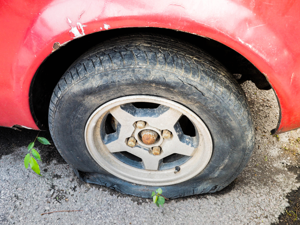

In [11]:
# View first image/row in train dataset
from PIL import Image
img_path = train_images.loc[0, 'filepath']
img = Image.open(img_path)
# Downsize image a little bit - Scale down by 50%
scale_factor = 0.3
new_size = (int(img.width * scale_factor), int(img.height * scale_factor))
img_scaled = img.resize(new_size)
display(img_scaled)